D:\DevelopmentTool\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


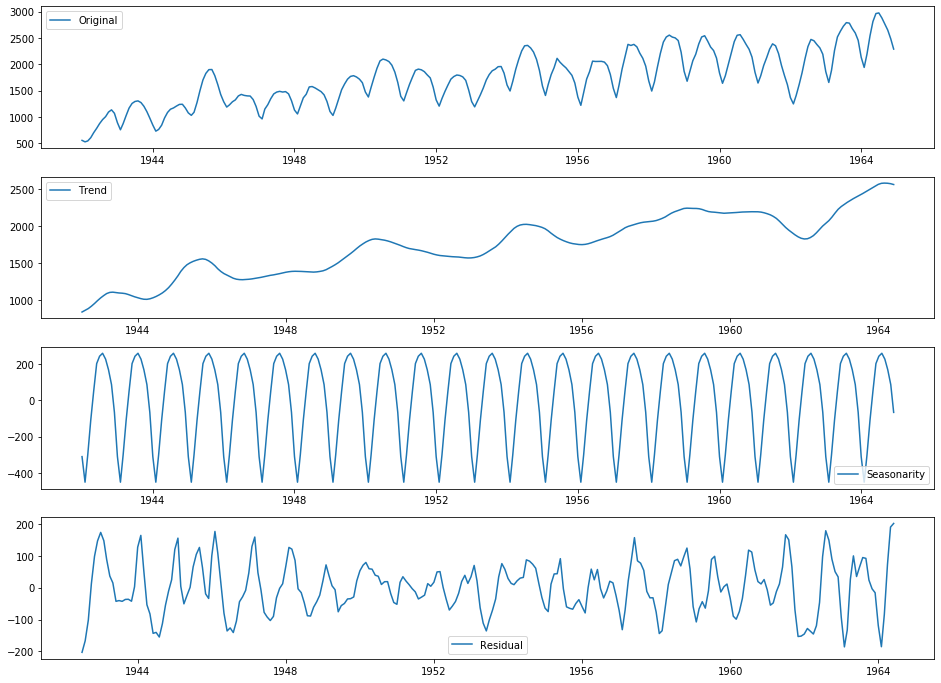

In [1]:
#数据可视化
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

def decomposing(timeseries):
    decomposition = seasonal_decompose(timeseries)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(16, 12))
    plt.subplot(411)
    plt.plot(timeseries, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonarity')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')
    plt.show()

dateparse = lambda dates: pd.datetime.strptime(str(dates), '%Y-%m-%d')
df = pd.read_csv('timeseries.csv', parse_dates=['date'],
                                 index_col='date', date_parser=dateparse)


decomposing(df)

In [2]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit = ExponentialSmoothing(df["value"], trend="add", seasonal="add", seasonal_periods=12).fit()
predict = fit.fittedvalues


D:\DevelopmentTool\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\DevelopmentTool\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


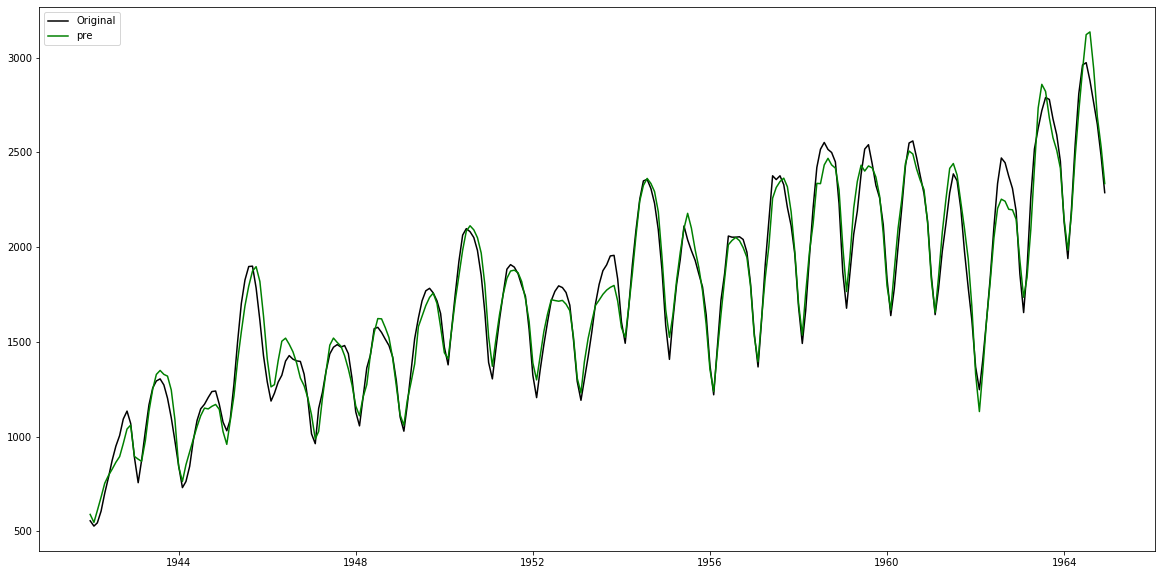

In [3]:
plt.figure(figsize=(20, 10))
plt.plot(df, label='Original', color='black')
plt.plot(predict, label='pre', color='green')
plt.legend(loc='best')
plt.show()

In [4]:
simulations = fit.forecast(12)
simulations
#simulations[0] = df.iloc[-1,0]

1965-01-01    1984.021253
1965-02-01    1801.530884
1965-03-01    2033.467829
1965-04-01    2333.689714
1965-05-01    2541.090747
1965-06-01    2663.658171
1965-07-01    2737.393640
1965-08-01    2765.504963
1965-09-01    2735.398519
1965-10-01    2638.397997
1965-11-01    2496.083025
1965-12-01    2348.986199
Freq: MS, dtype: float64

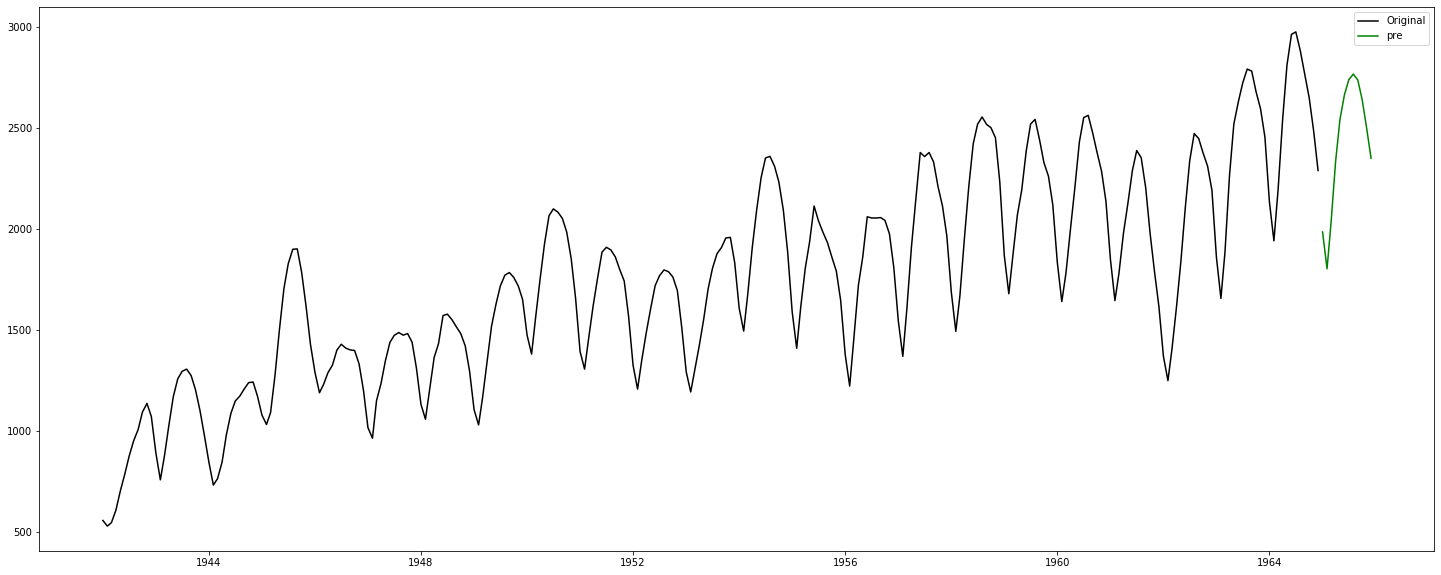

In [5]:
plt.figure(figsize=(25, 10))
plt.plot(df, label='Original', color='black')
plt.plot(simulations, label='pre', color='green')
plt.legend(loc='best')
plt.show()

In [16]:
fit.summary()

Dep. Variable:,endog,No. Observations:,276
Model:,ExponentialSmoothing,SSE,1729073.733
Optimized:,True,AIC,2444.984
Trend:,Additive,BIC,2502.910
Seasonal:,Additive,AICC,2447.645
Seasonal Periods:,12,Date:,"Fri, 29 Apr 2022"
Box-Cox:,False,Time:,17:40:08
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5263158,alpha,True
smoothing_slope,0.0426430,beta,True
